In [193]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [194]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_selection import RFECV


from sklearn import metrics
train_data=pd.read_csv("../input/heart-disease-prediction-using-logistic-regression/framingham.csv")

train_dataa=train_data
le = preprocessing.LabelEncoder()
train_data.rename(columns = {'male':'Sex'}, inplace = True) 




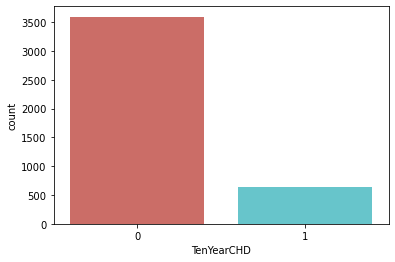

In [195]:
#plottingoutput variables
sns.countplot(x = 'TenYearCHD', data = train_data, palette = 'hls')
plt.show()

In [196]:
#checkifthereisnonullvalues
for i in train_data.columns:
    train_data[i]=le.fit_transform(train_data[i])

train_data_features=train_data.drop(["TenYearCHD"],axis=1)
train_data_output=train_dataa["TenYearCHD"]

X_train,X_test,y_train,y_test=train_test_split(train_data_features,train_data_output,test_size=0.20,random_state=2)



In [197]:
#logisticregresssion

logreg = LogisticRegression(max_iter =5000)


logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


[[703   4]
 [135   6]]
Accuracy: 0.8360849056603774


In [198]:
#gussainnb
gnb=GaussianNB()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[703   4]
 [135   6]]
Accuracy: 0.8360849056603774


In [199]:
logreg = LogisticRegression(max_iter=1500)
#usingrfe recurssivefeatureelimination
selector=RFE(logreg,n_features_to_select=2)
selector=selector.fit(x,y)
print(selector.ranking_)
for i,values in enumerate(selector.ranking_):
    print(train_data.columns[i],values)
    



a=["BMI","glucose","TenYearCHD","diaBP","heartRate",]
train_data_features=train_data.drop(a,axis=1)
train_data_output=train_dataa["TenYearCHD"]
print(train_data_features.columns)
X_train,X_test,y_train,y_test=train_test_split(train_data_features,train_data_output,test_size=0.30,random_state=2)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



[ 3  4  9  6  5  7  1  2  1 10  8 11 13 12 14]
Sex 3
age 4
education 9
currentSmoker 6
cigsPerDay 5
BPMeds 7
prevalentStroke 1
prevalentHyp 2
diabetes 1
totChol 10
sysBP 8
diaBP 11
BMI 13
heartRate 12
glucose 14
Index(['Sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP'],
      dtype='object')
[[1069    5]
 [ 188   10]]
Accuracy: 0.8482704402515723
